In [1]:
import os, glob
import MeCab
import pickle
import tfidf

# 変数の初期化
y = []
x = []

# MeCabの初期化
tagger = MeCab.Tagger(
    "-d /var/lib/mecab/dic/mecab-ipadic-neologd")

# ディレクトリ内のファイル一覧を処理
def read_files(path, label):
    print("read_files=", path)
    files = glob.glob(path + "/*.txt")
    for f in files:
        if os.path.basename(f) == 'LICENSE.txt': continue
        tfidf.add_file(f)
        y.append(label)
# ファイル一覧を読む
read_files('text/sports-watch', 0)
read_files('text/it-life-hack', 1)
read_files('text/movie-enter', 2)
read_files('text/dokujo-tsushin', 3)

# TF-IDFベクトルに変換
x = tfidf.calc_files()

# 保存
pickle.dump([y, x], open('text/genre.pickle', 'wb'))
tfidf.save_dic('text/genre-tdidf.dic')
print('ok')


read_files= text/sports-watch
read_files= text/it-life-hack
read_files= text/movie-enter
read_files= text/dokujo-tsushin
ok


In [2]:
x

[array([0.00578035, 0.00578035, 0.00578035, ..., 0.        , 0.        ,
        0.        ]),
 array([0.0052356, 0.0052356, 0.0052356, ..., 0.       , 0.       ,
        0.       ]),
 array([0.00735294, 0.00735294, 0.00735294, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00632911, 0.00632911, 0.00632911, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00909091, 0.00909091, 0.00909091, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00719424, 0.00719424, 0.00719424, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00606061, 0.00606061, 0.00606061, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00549451, 0.00549451, 0.00549451, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00512821, 0.00512821, 0.00512821, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00414938, 0.00414938, 0.00414938, ..., 0.        , 0.        ,
        0.        ]),
 array([0.00621118, 0.00621118, 0.00621118, ..., 0.     

In [4]:
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np

data = pickle.load(open("text/genre.pickle", "rb"))
y = data[0] # ラベル
x = data[1] # TF-IDF

x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2)
model = GaussianNB()
model.fit(x_train, y_train)
# 評価する ---(*5)
y_pred = model.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
rep = metrics.classification_report(y_test, y_pred)

print("正解率=", acc)
print(rep)


正解率= 0.9259259259259259
             precision    recall  f1-score   support

          0       0.97      0.95      0.96       168
          1       0.97      0.90      0.93       179
          2       0.86      0.97      0.91       183
          3       0.93      0.88      0.90       172

avg / total       0.93      0.93      0.93       702



/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Train on 2808 samples, validate on 702 samples
Epoch 1/20
2808/2808 [==============================] - 19s 7ms/step - loss: 0.6131 - acc: 0.8686 - val_loss: 0.1139 - val_acc: 0.9772
Epoch 2/20
2808/2808 [==============================] - 17s 6ms/step - loss: 0.0319 - acc: 0.9954 - val_loss: 0.0621 - val_acc: 0.9843
Epoch 3/20
2808/2808 [==============================] - 17s 6ms/step - loss: 0.0049 - acc: 0.9996 - val_loss: 0.0482 - val_acc: 0.9872
Epoch 4/20
2808/2808 [==============================] - 17s 6ms/step - loss: 8.7499e-04 - acc: 1.0000 - val_loss: 0.0443 - val_acc: 0.9858
Epoch 5/20
2808/2808 [==============================] - 17s 6ms/step - loss: 2.3980e-04 - acc: 1.0000 - val_loss: 0.0445 - val_acc: 0.9872
Epoch 6/20
2808/2808 [==============================] - 17s 6ms/step - loss: 6.4788e-05 - acc: 1.0000 - val_loss: 0.0460 - val_acc: 0.9886
Epoch 7/20
2808/2808 [==============================] - 18s 6ms/step - loss: 2.0019e-05 - acc: 1.0000 - val_loss: 0.0479 - val_acc:

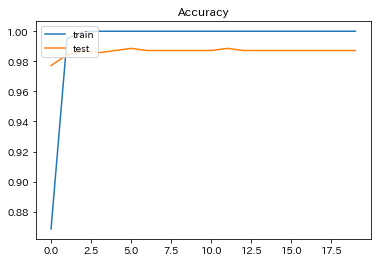

In [5]:
import pickle
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.datasets import mnist
import matplotlib.pyplot as plt

# 分類するラベルの数 --- (*1)
nb_classes = 4

# データベースの読込 --- (*2)
data = pickle.load(open("text/genre.pickle", "rb"))
y = data[0] # ラベル
x = data[1] # TF-IDF
# ラベルデータをone-hotベクトルに直す --- (*3)
y = keras.utils.np_utils.to_categorical(y, nb_classes)
in_size = x[0].shape[0]

# 学習用とテスト用を分ける --- (*4)
x_train, x_test, y_train, y_test = train_test_split(
        np.array(x), np.array(y), test_size=0.2)

# MLPモデル構造を定義 --- (*5)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))

# モデルをコンパイル --- (*6)
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

# 学習を実行 --- (*7)
hist = model.fit(x_train, y_train,
          batch_size=128, 
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

# 評価する ---(*8)
score = model.evaluate(x_test, y_test, verbose=1)
print("正解率=", score[1], 'loss=', score[0])

# 重みデータを保存 --- (*9)
model.save_weights('./text/genre-model.hdf5')
open('./text/genre-model.json', 'wt').write(model.to_json())

# 学習の様子をグラフへ描画 --- (*10)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [28]:
import pickle, tfidf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json

# 独自のテキストを指定 --- (*1)
text1 = """
野球を観るのは楽しいものです。
試合だけでなくインタビューも楽しみです。
"""
text2 = """
常にiPhoneとiPadを持っているので、
二口あるモバイルバッテリがあると便利。
"""
text3 = """
幸せな結婚の秘訣は何でしょうか。
夫には敬意を、妻には愛情を示すことが大切。
"""

# TF-IDFの辞書を読み込む --- (*2)
tfidf.load_dic("text/genre-tdidf.dic")

# Kerasのモデルを定義して重みデータを読み込む --- (*3)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(52800,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
model.load_weights('./text/genre-model.hdf5')

# テキストを指定して判定 --- (*4)
def check_genre(text):
    # ラベルの定義
    LABELS = ["スポーツ", "IT", "映画", "ライフ"]
    # TF-IDFのベクトルに変換 -- (*5)
    data = tfidf.calc_text(text)
    # MLPで予測 --- (*6)
    pre = model.predict(np.array([data]))[0]
    n = pre.argmax()
    print(LABELS[n], "(", pre[n], ")")

check_genre(text1)
check_genre(text2)
check_genre(text3)



スポーツ ( 0.7213282 )
IT ( 1.0 )
ライフ ( 0.9999999 )


In [4]:
import pickle, tfidf
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.models import model_from_json

# 独自のテキストを指定 --- (*1)
text1 = """
野球を観るのは楽しいものです。
試合だけでなくインタビューも楽しみです。
"""
text2 = """
常にiPhoneとiPadを持っているので、
二口あるモバイルバッテリがあると便利。
"""
text3 = """
幸せな結婚の秘訣は何でしょうか。
夫には敬意を、妻には愛情を示すことが大切。
"""

# TF-IDFの辞書を読み込む --- (*2)
tfidf.load_dic("text/genre-tdidf.dic")

# Kerasのモデルを定義して重みデータを読み込む --- (*3)
nb_classes = 4
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(52800,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
model.load_weights('./text/genre-model.hdf5')

# テキストを指定して判定 --- (*4)
def check_genre(text):
    # ラベルの定義
    LABELS = ["スポーツ", "IT", "映画", "ライフ"]
    # TF-IDFのベクトルに変換 -- (*5)
    data = tfidf.calc_text(text)
    # MLPで予測 --- (*6)
    pre = model.predict(np.array([data]))[0]
    n = pre.argmax()
    print(LABELS[n], "(", pre[n], ")")

if __name__ == '__main__':
    check_genre(text1)
    check_genre(text2)
    check_genre(text3)



スポーツ ( 0.7213282 )
IT ( 1.0 )
ライフ ( 1.0 )


In [3]:
__name__

'__main__'